#**Task 1: Handling Missing Data in Titanic Dataset**

In [1]:
#Task1: Handling Missing Data in Titanic Dataset
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
import pandas as pd
titanic_df = pd.read_csv (next (iter (uploaded.keys() ) ) )

# Identify missing values
print(titanic_df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Mean/median imputation
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Mode imputation
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Dropping rows/columns
titanic_df.dropna(subset=['Cabin'], inplace=True)
titanic_df.drop(columns=['Cabin'], inplace=True)
print(titanic_df.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
10           11         1       3   
11           12         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   

    Parch    Ticket     Fare Embarked  
1       0  PC 17599  71.2833        C  
3       0    113803  53.1000        S  
6       0     17463  51.8625        S  
10      1   PP 9549  16.7000        S  
11      0    113783  26.5500        S  


# **Task 2: Encoding Categorical Variables in Car Evaluation Dataset**

In [11]:
#Task2: Encoding Categorical Variables in Car Evaluation Dataset
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
car_evaluation_df = pd.read_csv (next (iter (uploaded.keys()) ) )
print(car_evaluation_df.columns)

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')


In [16]:
column_name = 'vhigh'
# Label encoding
label_encoder = LabelEncoder()
car_evaluation_df[column_name] = label_encoder.fit_transform(car_evaluation_df[column_name])

# One-hot encoding
one_hot_encoder = OneHotEncoder()
car_evaluation_df_encoded = one_hot_encoder.fit_transform(car_evaluation_df[[column_name]]).toarray()

# Comparing results
print(car_evaluation_df.head())
print(pd.DataFrame(car_evaluation_df_encoded).head())

   vhigh vhigh.1  2 2.1  small   low  unacc
0      3   vhigh  2   2  small   med  unacc
1      3   vhigh  2   2  small  high  unacc
2      3   vhigh  2   2    med   low  unacc
3      3   vhigh  2   2    med   med  unacc
4      3   vhigh  2   2    med  high  unacc
     0    1    2    3
0  0.0  0.0  0.0  1.0
1  0.0  0.0  0.0  1.0
2  0.0  0.0  0.0  1.0
3  0.0  0.0  0.0  1.0
4  0.0  0.0  0.0  1.0


# **Task 3: Scaling Features in the Wine Quality Dataset**

In [17]:
#Task3: Scaling Features in the Wine Quality Dataset
from google.colab import files
uploaded = files.upload()

Saving Wine.csv to Wine.csv


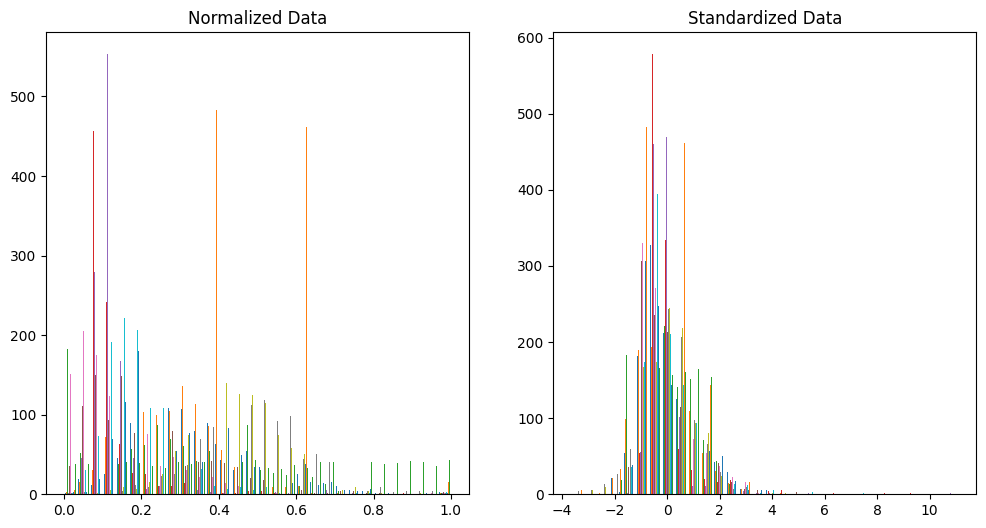

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
Wine_df = pd.read_csv(next (iter ( uploaded.keys() ) ) )

# Normalization
scaler = MinMaxScaler()
Wine_normalized = scaler.fit_transform(Wine_df)

# Standardization
scaler = StandardScaler()
Wine_standardized = scaler.fit_transform(Wine_df)

# Analyzing distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(Wine_normalized, bins=30)
plt.title('Normalized Data')
plt.subplot(1, 2, 2)
plt.hist(Wine_standardized, bins=30)
plt.title('Standardized Data')
plt.show()

# **Task 4: Handling Outliers in the Boston Housing Dataset**

In [22]:
#Task4: Handling Outliers in the Boston Housing Dataset
from google.colab import files
uploaded = files.upload()

Saving BostonHousing.csv to BostonHousing.csv


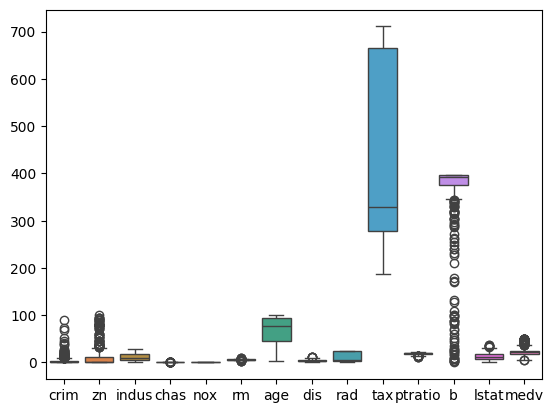

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
BostonHousing_df = pd.read_csv (next (iter (uploaded.keys() ) ) )

# Z-score method
z_scores = np.abs(zscore(BostonHousing_df))
outliers = np.where(z_scores > 3)

# IQR method
Q1 = BostonHousing_df.quantile(0.25)
Q3 = BostonHousing_df.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = (BostonHousing_df < (Q1 - 1.5 * IQR)) | (BostonHousing_df > (Q3 + 1.5 * IQR))

# Visualization
sns.boxplot(data = BostonHousing_df)
plt.show()

# **Task 5: Data Imputation in the Retail Sales Dataset**

In [27]:
#Task5: Data Imputation in the Retail Sales Dataset
from google.colab import files
uploaded = files.upload()

Saving retail_sales.csv to retail_sales.csv


In [32]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

retail_sales_df = pd.read_csv(next(iter(uploaded.keys())))

# As KNN imputer only applied on numberic data but there is also non-numeric data in the dataset. So we have to separate numeric and non-numeric columns
numeric_df = retail_sales_df.select_dtypes(include=[float, int])
non_numeric_df = retail_sales_df.select_dtypes(exclude=[float, int])

# Apply KNN imputation to numeric columns
knn_imputer = KNNImputer(n_neighbors=5)
numeric_imputed_knn = pd.DataFrame(knn_imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Apply MICE imputation to numeric columns
mice_imputer = IterativeImputer()
numeric_imputed_mice = pd.DataFrame(mice_imputer.fit_transform(numeric_df), columns=numeric_df.columns)

# Combine the imputed numeric and non-numeric data
retail_sales_imputed_knn = pd.concat([numeric_imputed_knn, non_numeric_df.reset_index(drop=True)], axis=1)
retail_sales_imputed_mice = pd.concat([numeric_imputed_mice, non_numeric_df.reset_index(drop=True)], axis=1)

# Print the results
print("KNN Imputed DataFrame: ")
print(retail_sales_imputed_knn.head())

print("\nMICE Imputed DataFrame: ")
print(retail_sales_imputed_mice.head())

KNN Imputed DataFrame: 
   Transaction ID   Age  Quantity  Price per Unit  Total Amount        Date  \
0             1.0  34.0       3.0            50.0         150.0  2023-11-24   
1             2.0  26.0       2.0           500.0        1000.0  2023-02-27   
2             3.0  50.0       1.0            30.0          30.0  2023-01-13   
3             4.0  37.0       1.0           500.0         500.0  2023-05-21   
4             5.0  30.0       2.0            50.0         100.0  2023-05-06   

  Customer ID  Gender Product Category  
0     CUST001    Male           Beauty  
1     CUST002  Female         Clothing  
2     CUST003    Male      Electronics  
3     CUST004    Male         Clothing  
4     CUST005    Male           Beauty  

MICE Imputed DataFrame: 
   Transaction ID   Age  Quantity  Price per Unit  Total Amount        Date  \
0             1.0  34.0       3.0            50.0         150.0  2023-11-24   
1             2.0  26.0       2.0           500.0        1000.0  2023-0

# **Task 6: Feature Engineering in the Heart Disease Dataset**

In [33]:
#Task6: Feature Engineering in the Heart Disease Dataset
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [34]:
import pandas as pd
heart_df = pd.read_csv(next(iter(uploaded.keys())))

# Create new features
heart_df['age_group'] = pd.cut(heart_df['age'], bins=[29, 40, 50, 60, 70, 80], labels=['30-40', '41-50', '51-60', '61-70', '71-80'])
heart_df['cholesterol_level'] = pd.cut(heart_df['chol'], bins=[0, 200, 240, 300, 400], labels=['Normal', 'Borderline', 'High', 'Very High'])
print(heart_df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target age_group cholesterol_level  
0   2     3       0     51-60        Borderline  
1   0     3       0     51-60        Borderline  
2   0     3       0     61-70            Normal  
3   1     3       0     61-70        Borderline  
4   3     2       0     61-70              High  


# **Task 7: Transforming Variables in the Bike Sharing Dataset**

In [35]:
#Task7: Transforming Variables in the Bike Sharing Dataset
from google.colab import files
uploaded = files.upload()

Saving london_bike_share.csv to london_bike_share.csv


In [37]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
london_bike_share_df = pd.read_csv(next(iter(uploaded.keys())))

print(london_bike_share_df.columns)

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [40]:
column_name = 'cnt'
# Log transformation
london_bike_share_df['log_cnt'] = np.log(london_bike_share_df[column_name] + 1)

# Square root transformation
london_bike_share_df['sqrt_cnt'] = np.sqrt(london_bike_share_df[column_name])

# Box-Cox transformation
london_bike_share_df['boxcox_cnt'], _ = boxcox(london_bike_share_df[column_name] + 1)

print(london_bike_share_df.head())

             timestamp  cnt   t1   t2    hum  wind_speed  weather_code  \
0  2015-01-04 00:00:00  182  3.0  2.0   93.0         6.0           3.0   
1  2015-01-04 01:00:00  138  3.0  2.5   93.0         5.0           1.0   
2  2015-01-04 02:00:00  134  2.5  2.5   96.5         0.0           1.0   
3  2015-01-04 03:00:00   72  2.0  2.0  100.0         0.0           1.0   
4  2015-01-04 04:00:00   47  2.0  0.0   93.0         6.5           1.0   

   is_holiday  is_weekend  season   log_cnt   sqrt_cnt  boxcox_cnt  
0         0.0         1.0     3.0  5.209486  13.490738   10.884991  
1         0.0         1.0     3.0  4.934474  11.747340    9.882018  
2         0.0         1.0     3.0  4.905275  11.575837    9.779602  
3         0.0         1.0     3.0  4.290459   8.485281    7.791138  
4         0.0         1.0     3.0  3.871201   6.855655    6.603341  


# **Task 8: Feature Selection in the Diabetes Dataset**

In [41]:
#Task8: Feature Selection in the Diabetes Dataset
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [43]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.linear_model import LogisticRegression
diabetes_df = pd.read_csv(next(iter(uploaded.keys())))

# Correlation analysis
correlation_matrix = diabetes_df.corr()

# Mutual information
X = diabetes_df.drop(columns='Outcome')
y = diabetes_df['Outcome']
mi = mutual_info_classif(X, y)

# Recursive Feature Elimination (RFE)
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

print(fit.support_)
print(fit.ranking_)

[ True  True False False False  True  True  True]
[1 1 2 3 4 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Task 9: Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset**

In [45]:
#Task9: Dealing with Imbalanced Data in the Credit Card Fraud Detection Dataset
from google.colab import files
uploaded = files.upload()

Saving CreditCard.csv to CreditCard.csv


In [48]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
CreditCard_df = pd.read_csv(next(iter(uploaded.keys())))

# SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(CreditCard_df.drop(columns='Class'), CreditCard_df['Class'])

# ADASYN
adasyn = ADASYN()
X_adasyn, y_adasyn = adasyn.fit_resample(CreditCard_df.drop(columns='Class'), CreditCard_df['Class'])

# Undersampling
sample = RandomUnderSampler()
X_sample, y_sample = sample.fit_resample(CreditCard_df.drop(columns='Class'), CreditCard_df['Class'])

# Printing the results
print("SMOTE: ")
print("X_smote shape:", X_smote.shape)
print("y_smote shape:", y_smote.shape)
print("\nADASYN: ")
print("X_adasyn shape:", X_adasyn.shape)
print("y_adasyn shape:", y_adasyn.shape)
print("\nUndersampling: ")
print("X_sample shape:", X_sample.shape)
print("y_sample shape:", y_sample.shape)

SMOTE: 
X_smote shape: (568630, 30)
y_smote shape: (568630,)

ADASYN: 
X_adasyn shape: (568613, 30)
y_adasyn shape: (568613,)

Undersampling: 
X_sample shape: (984, 30)
y_sample shape: (984,)


# **Task 10: Combining Multiple Datasets in the Movie Lens Dataset**

In [50]:
#Task 10: Combining Multiple Datasets in the Movie Lens Dataset
from google.colab import files
uploaded = files.upload()

Saving links.csv to links.csv
Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv
Saving tags.csv to tags.csv


In [52]:
import pandas as pd
# Load the Movie Lens datasets
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
links_df = pd.read_csv('links.csv')
tags_df = pd.read_csv('tags.csv')

# Combining Datasets
combined_df = pd.merge(ratings_df, movies_df, on='movieId')
combined_df = pd.merge(combined_df, links_df, on='movieId')
combined_df = pd.merge(combined_df, tags_df, on='movieId')

print(combined_df.head())

   userId_x  movieId  rating  timestamp_x             title  \
0         1        1     4.0    964982703  Toy Story (1995)   
1         1        1     4.0    964982703  Toy Story (1995)   
2         1        1     4.0    964982703  Toy Story (1995)   
3         5        1     4.0    847434962  Toy Story (1995)   
4         5        1     4.0    847434962  Toy Story (1995)   

                                        genres  imdbId  tmdbId  userId_y  \
0  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0       336   
1  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0       474   
2  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0       567   
3  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0       336   
4  Adventure|Animation|Children|Comedy|Fantasy  114709   862.0       474   

     tag  timestamp_y  
0  pixar   1139045764  
1  pixar   1137206825  
2    fun   1525286013  
3  pixar   1139045764  
4  pixar   1137206825  
